In [1]:
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist
import gzip
import numpy as np

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
x_train = open_images("train-images-idx3-ubyte.gz")
x_test = open_images("t10k-images-idx3-ubyte.gz")

y_train = open_labels("train-labels-idx1-ubyte.gz")
y_test = open_labels("t10k-labels-idx1-ubyte.gz")

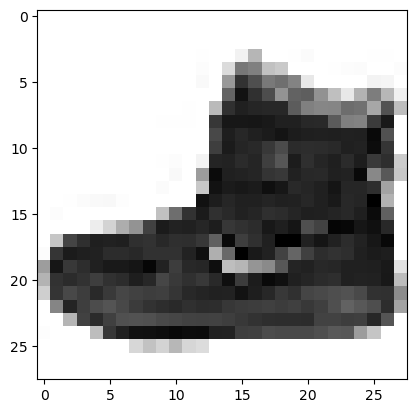

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray_r")
plt.show()

In [3]:
# generate categorical from y_train model
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [33]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

model.add(Conv2D(30, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
# use different optimizer like adam, rmsprops
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 5s 78ms/step - loss: 14.9593 - accuracy: 0.7138
Epoch 2/10
60/60 [==============================] - 5s 83ms/step - loss: 1.0783 - accuracy: 0.8561
Epoch 3/10
60/60 [==============================] - 5s 80ms/step - loss: 0.5056 - accuracy: 0.8829
Epoch 4/10
60/60 [==============================] - 5s 78ms/step - loss: 0.3364 - accuracy: 0.9042
Epoch 5/10
60/60 [==============================] - 5s 79ms/step - loss: 0.2666 - accuracy: 0.9150
Epoch 6/10
60/60 [==============================] - 5s 79ms/step - loss: 0.2117 - accuracy: 0.9293
Epoch 7/10
60/60 [==============================] - 5s 76ms/step - loss: 0.1881 - accuracy: 0.9354
Epoch 8/10
60/60 [==============================] - 5s 77ms/step - loss: 0.1739 - accuracy: 0.9406
Epoch 9/10
60/60 [==============================] - 5s 81ms/step - loss: 0.1467 - accuracy: 0.9482
Epoch 10/10
60/60 [==============================] - 5s 79ms/step - loss: 0.1376 - accuracy: 0.9514


In [32]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

model.add(Conv2D(30, kernel_size=(5, 5), activation="relu", input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(50, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 6s 87ms/step - loss: 1.7624 - accuracy: 0.5382
Epoch 2/10
60/60 [==============================] - 5s 87ms/step - loss: 0.9108 - accuracy: 0.8096
Epoch 3/10
60/60 [==============================] - 5s 91ms/step - loss: 0.5467 - accuracy: 0.8590
Epoch 4/10
60/60 [==============================] - 5s 91ms/step - loss: 0.4240 - accuracy: 0.8757
Epoch 5/10
60/60 [==============================] - 6s 92ms/step - loss: 0.3561 - accuracy: 0.8878
Epoch 6/10
60/60 [==============================] - 6s 92ms/step - loss: 0.3156 - accuracy: 0.8955
Epoch 7/10
60/60 [==============================] - 6s 94ms/step - loss: 0.2871 - accuracy: 0.9032
Epoch 8/10
60/60 [==============================] - 5s 90ms/step - loss: 0.2677 - accuracy: 0.9079
Epoch 9/10
60/60 [==============================] - 6s 98ms/step - loss: 0.2456 - accuracy: 0.9146
Epoch 10/10
60/60 [==============================] - 6s 95ms/step - loss: 0.2332 - accuracy: 0.9199


In [34]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

model.add(Conv2D(30, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(100, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 6s 100ms/step - loss: 1.2867 - accuracy: 0.6324
Epoch 2/10
60/60 [==============================] - 6s 100ms/step - loss: 0.8807 - accuracy: 0.7583
Epoch 3/10
60/60 [==============================] - 6s 97ms/step - loss: 0.7549 - accuracy: 0.7908
Epoch 4/10
60/60 [==============================] - 6s 103ms/step - loss: 0.6816 - accuracy: 0.8063
Epoch 5/10
60/60 [==============================] - 6s 107ms/step - loss: 0.6280 - accuracy: 0.8193
Epoch 6/10
60/60 [==============================] - 6s 97ms/step - loss: 0.5868 - accuracy: 0.8313
Epoch 7/10
60/60 [==============================] - 6s 101ms/step - loss: 0.5568 - accuracy: 0.8378
Epoch 8/10
60/60 [==============================] - 6s 102ms/step - loss: 0.5277 - accuracy: 0.8438
Epoch 9/10
60/60 [==============================] - 6s 102ms/step - loss: 0.5046 - accuracy: 0.8498
Epoch 10/10
60/60 [==============================] - 7s 117ms/step - loss: 0.4884 - accuracy: 0.8536


In [6]:
Conv2D?

[[[[-0.05890555  0.03103518 -0.12903163 -0.11628349 -0.06489098
    -0.09168585 -0.05812627 -0.05308218  0.0754264  -0.11676047
    -0.08673235 -0.1323271  -0.04068283  0.09189129 -0.09624124
     0.05562911 -0.0632987  -0.1763871  -0.04148884 -0.12233811
     0.10610121  0.09436987 -0.04307845 -0.00023852  0.01879418
     0.11660858 -0.03248509 -0.01180005  0.11891409 -0.02300857]]

  [[ 0.02398582  0.11288927 -0.0376083  -0.03334801  0.04878327
    -0.08027697 -0.0614361  -0.09075318  0.01222572 -0.0636387
     0.13495202  0.06867715 -0.12791842 -0.04022878 -0.07544352
     0.00357766  0.10232288  0.06777173  0.09930815  0.04034894
     0.10628377 -0.10438461 -0.05273028  0.07549894  0.12393607
     0.05028316  0.12046889 -0.02617742  0.11996868  0.11323541]]

  [[ 0.04273577 -0.10190297  0.19586015 -0.11128807 -0.07240252
    -0.00461031  0.03274919  0.06093162  0.09448447 -0.1342279
     0.01456344  0.11509576 -0.04055874  0.06018851  0.09338664
    -0.02778896 -0.11922553  0.13388

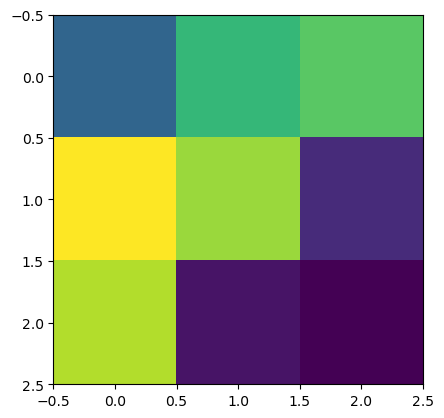

In [42]:
# Plot generated filters

import keras.backend as K
data = K.eval(model.layers[0].weights[0])
print(data)

%matplotlib inline
import matplotlib.pyplot as plt

# Plot layer 0
plt.imshow(data[:, :, :, 0])
plt.show()

In [11]:
model.evaluate(x_train.reshape(-1, 28, 28, 1), y_train) # Gives accuracy from train data

1875/1875 [==============================] - 3s 1ms/step - loss: 0.1587 - accuracy: 0.9427


[0.15870597958564758, 0.942716658115387]

In [12]:
model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test) # Gives accuracy from test data

313/313 [==============================] - 1s 1ms/step - loss: 0.5592 - accuracy: 0.8613


[0.5592095255851746, 0.861299991607666]

In [14]:
p = x_test[0].reshape(1, 28, 28, 1)
p.shape

(1, 28, 28, 1)

In [15]:
# Gives the highest index of array values
np.argmax(model.predict(p))

1/1 [==============================] - 0s 67ms/step


9

In [43]:
model.predict(p)

1/1 [==============================] - 0s 48ms/step


array([[0.00461422, 0.00453364, 0.01195427, 0.01089976, 0.00681681,
        0.06110476, 0.00958969, 0.12370613, 0.01038157, 0.75639915]],
      dtype=float32)

In [16]:
pred = model.predict(x_test.reshape(-1, 28, 28, 1))

313/313 [==============================] - 0s 1ms/step


In [18]:
# Confusion Matrix on test data
import pandas as pd

ytrue = pd.Series(np.argmax(y_test, axis = 1), name = 'actual')
ypred = pd.Series(np.argmax(pred, axis = 1), name = 'pred')

pd.crosstab(ytrue, ypred)

pred,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,800,7,26,29,3,2,122,0,11,0
1,3,968,5,14,5,0,4,0,1,0
2,27,1,820,7,74,0,64,0,7,0
3,31,16,19,849,33,1,41,0,10,0
4,3,1,128,34,731,0,100,0,3,0
5,0,0,0,0,0,954,0,27,4,15
6,132,0,101,38,75,0,637,0,17,0
7,0,0,0,0,0,22,0,946,1,31
8,6,1,3,6,5,2,12,8,956,1
